In [3]:
# Langkah 1: Upload kaggle.json ke Colab
from google.colab import files
files.upload()  # Pilih file kaggle.json dari laptop kamu


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurulhadiiiiiiiii","key":"c360601634b8658c4a6a9c25de0ca23f"}'}

In [4]:
# Langkah 2: Simpan kaggle.json ke direktori yang benar dan atur izin
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Langkah 3: Download dataset dari Kaggle
# Dataset yang kamu minta: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

!kaggle datasets download -d adityadesai13/used-car-dataset-ford-and-mercedes


Dataset URL: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
License(s): CC0-1.0
  0% 0.00/1.10M [00:00<?, ?B/s]
100% 1.10M/1.10M [00:00<00:00, 505MB/s]


In [6]:
# Langkah 4: Ekstrak file ZIP
import zipfile
import os

with zipfile.ZipFile("used-car-dataset-ford-and-mercedes.zip", 'r') as zip_ref:
    zip_ref.extractall("used_car_data")

# Cek file yang tersedia
os.listdir("used_car_data")


['vw.csv',
 'unclean focus.csv',
 'skoda.csv',
 'ford.csv',
 'bmw.csv',
 'vauxhall.csv',
 'cclass.csv',
 'merc.csv',
 'focus.csv',
 'hyundi.csv',
 'toyota.csv',
 'audi.csv',
 'unclean cclass.csv']

In [7]:
# Langkah 5: Load dataset ke pandas
import pandas as pd

# Ganti nama file sesuai hasil unzip (contoh: 'ford.csv' atau 'merc.csv')
df = pd.read_csv("used_car_data/ford.csv")
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [8]:
# Cek info dan missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [9]:
x = df[['year','mileage','tax','mpg','engineSize']]
y = df['price']


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [12]:
hasil = model.predict(x_test)


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE :", mean_absolute_error(y_test, hasil))
print("MSE :", mean_squared_error(y_test, hasil))
print("R2 :", r2_score(y_test, hasil))


MAE : 1788.5498625161927
MSE : 7438610.014414934
R2 : 0.6823261748401572


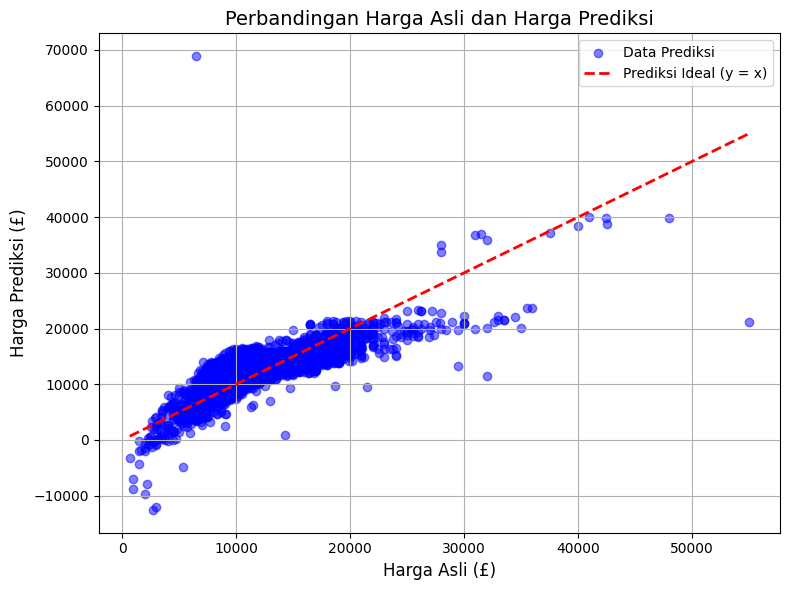

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, hasil, alpha=0.5, color='blue', label='Data Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Prediksi Ideal (y = x)')

plt.title('Perbandingan Harga Asli dan Harga Prediksi', fontsize=14)
plt.xlabel('Harga Asli (£)', fontsize=12)
plt.ylabel('Harga Prediksi (£)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
